- 다둥이 행복카드 -> 자녀가 있는 집 -> 관련하여 check (다둥이 고객번호와 다른 것 연관) -> 에버랜드, 롯데월드 등 할인
- 서울시에서 민간기업과 함께 다자녀 가정에 대한 경제적 혜택 및 문화생활 지원을 위해 실시하는 사업 (2자녀 이상, 막내가 만 13세 이하)
- 바일 더영 : 많지는 않음, 만 14~35세 대상, 영플라자및 전 영패션, 스포츠 상품 구매 추가적립, 레스토랑 및 카페 할인, 구매금액 적립 등
- 롭스 : 망한듯

# Membership 분석
#### 기본
- unique고객번호: 6498건 (L.point 총 등록 고객번호 : 19383건 중 33.5%)
- row : 7456건

#### 가입년월
- 2012년 10월 ~ 2015년 12월까지 39개월의 기간 데이터임
- 

#### 하이마트 > 다둥이 > 더영 > 롭스 순임
- 다둥이 : 유아관련 상품, 분유 등 매출 급감 상품과의 비교 분석 예정


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
import warnings

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 멤버십명 ,count(*) from membership
group by 멤버십명
order by count(*) desc
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_m.head()

,멤버십명,COUNT(*)
0,하이마트,4418
1,다둥이,2009
2,더영,642
3,롭스,387


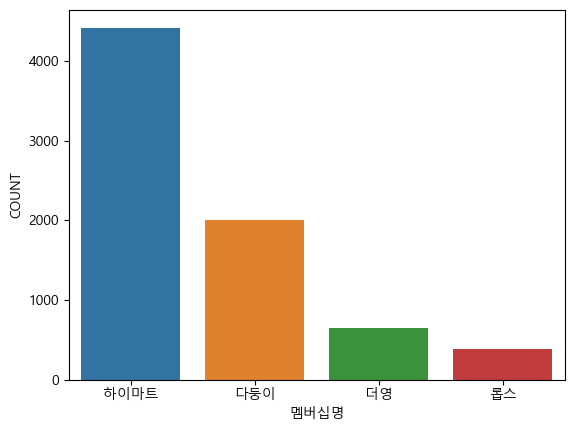

In [ ]:
sns.barplot(data=df_m, x='멤버십명', y='COUNT(*)')
plt.xlabel('멤버십명')
plt.ylabel('COUNT')
plt.show()

### 년도별 가입인원

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select
case when 가입년월 like '2012%' then '2012'
when 가입년월 like '2013%' then '2013'
when 가입년월 like '2014%' then '2014'
else '2015' end 가입연도, count(*)
from membership
group by case when 가입년월 like '2012%' then '2012'
when 가입년월 like '2013%' then '2013'
when 가입년월 like '2014%' then '2014'
else '2015' end
order by 가입연도
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_m.head()

,가입연도,COUNT(*)
0,2012,6
1,2013,2167
2,2014,2728
3,2015,2555


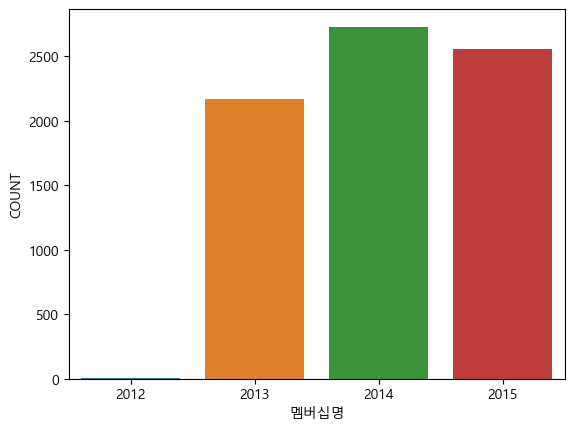

In [ ]:
sns.barplot(data=df_m, x='가입연도', y='COUNT(*)')
plt.xlabel('멤버십명')
plt.ylabel('COUNT')
plt.show()

### 월별 가입인원

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 가입년월 ,count(*) from membership
group by 가입년월
order by count(*) desc
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_m.head()

,가입년월,COUNT(*)
0,201303,547
1,201403,468
2,201307,264
3,201406,263
4,201503,262


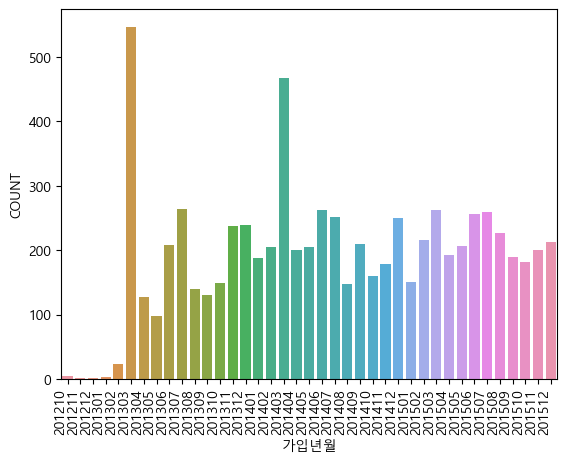

In [ ]:
# 3월이 가장 가입이 많음
sns.barplot(data=df_m, x='가입년월', y='COUNT(*)')
plt.xticks(rotation=90, ha='right')
plt.xlabel('가입년월')
plt.ylabel('COUNT')
plt.show()

### 다둥이 고객번호 파악 및 연관 분석 해보기

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 고객번호
from membership
where 멤버십명 = '다둥이'
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_m.head()